In [18]:
import sys
sys.path.append('..')

# swarm algorithms imports
from swarm_algo.abc import ArtificialBeeColony as ABC

# problem imports
from problem.knapsack import Knapsack
from problem.tsp import TSP
from problem.ackley import AckleyFunction
from problem.rosenbrock import RosenbrockFunction

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# utility imports
import random
import time
import logging
import os
from tqdm import tqdm
from typing import List, Tuple, Dict, Any
from pathlib import Path


In [19]:
DATASET_FOLDER = str(Path.cwd() / ".." / "data")

In [20]:
logging.basicConfig(level=logging.INFO)
np.random.seed(42)
random.seed(42)

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 10

# Artificial Bee Colony Algorithm - Parameter Analysis on Rosenbrock Function


Các tham số quan trọng trong ABC:
- `sn`: số lượng nguồn thức ăn (employed bees, onlooker bees cũng bằng sn).
- `limit`: số lần thử không cải thiện trước khi bỏ nguồn thức ăn (abandonment threshold).
- `mcn`: số vòng lặp tối đa (maximum cycle number).

**Rosenbrock Function:**
- Hàm Rosenbrock (Banana function): $f(x) = \sum_{i=1}^{n-1} [100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2]$
- Global minimum: $f(1, 1, ..., 1) = 0$

In [21]:
def run_abc_rosenbrock(
    problem_num,
    sn=20,
    limit=100,
    mcn=200,
    num_runs=5,
):
    """
    Run ABC on Rosenbrock function.

    Args:
        problem_num: Test case number
        sn: Number of food sources (employed bees)
        limit: Abandonment threshold
        mcn: Maximum cycle number
        num_runs: Number of independent runs

    Returns:
        Dictionary with results
    """
    rosenbrock_folder = os.path.join(DATASET_FOLDER, "rosenbrock/")
    rosenbrock = RosenbrockFunction(
        PROBLEM_FOLDER=rosenbrock_folder, PROBLEM=problem_num
    )

    best_fitnesses = []
    convergence_histories = []
    execution_times = []

    for run in range(num_runs):
        # Initialize ABC
        abc = ABC(
            dimension=rosenbrock.dimension,
            sn=sn,
            mcn=mcn,
            limit=limit,
            lb=-5.0,
            ub=5.0,
        )

        # Set objective function
        abc.set_objective_function(rosenbrock.calculate_fitness)

        # Run algorithm
        start_time = time.time()
        best_solution, best_fitness, history = abc.run(visualize=False)
        end_time = time.time()

        # Convert fitness back to objective value
        # ABC uses fitness = 1/(1+value) for minimization, so value = 1/fitness - 1
        best_value = 1/best_fitness - 1 if best_fitness > 0 else float('inf')
        
        # Convert history (fitness values) to objective values
        obj_history = [1/f - 1 if f > 0 else float('inf') for f in history]

        best_fitnesses.append(best_value)
        convergence_histories.append(obj_history)
        execution_times.append(end_time - start_time)

    return {
        "best_fitness": np.min(best_fitnesses),
        "avg_fitness": np.mean(best_fitnesses),
        "std_fitness": np.std(best_fitnesses),
        "convergence_history": convergence_histories,
        "avg_time": np.mean(execution_times),
        "all_best_fitnesses": best_fitnesses,
    }


## 1. Phân tích độ nhạy của tham số `sn` (Population Size)

In [22]:
problem_num = 1
sn_values = [5, 10, 15, 20, 25, 30, 40, 50]
mcn = 200
num_runs = 5

results_sn = []

print("Đang test tham số sn...")
for n in tqdm(sn_values):
    result = run_abc_rosenbrock(
        problem_num=problem_num,
        sn=n,
        limit=100,
        mcn=mcn,
        num_runs=num_runs,
    )
    result["sn"] = n
    results_sn.append(result)
    print(
        f"sn={n}: Best={result['best_fitness']:.4f}, Avg={result['avg_fitness']:.4f}, Time={result['avg_time']:.3f}s"
    )

Đang test tham số sn...


 12%|█▎        | 1/8 [00:00<00:00,  8.83it/s]

sn=5: Best=0.8133, Avg=2.5027, Time=0.022s


 25%|██▌       | 2/8 [00:00<00:01,  5.77it/s]

sn=10: Best=1.2020, Avg=1.9003, Time=0.043s


 38%|███▊      | 3/8 [00:00<00:01,  4.07it/s]

sn=15: Best=0.0406, Avg=0.8387, Time=0.066s


 50%|█████     | 4/8 [00:01<00:01,  3.05it/s]

sn=20: Best=0.1695, Avg=1.6121, Time=0.090s


 62%|██████▎   | 5/8 [00:02<00:01,  1.57it/s]

sn=25: Best=0.3063, Avg=0.9804, Time=0.236s


 75%|███████▌  | 6/8 [00:04<00:02,  1.26s/it]

sn=30: Best=0.7820, Avg=1.0156, Time=0.493s


 88%|████████▊ | 7/8 [00:09<00:02,  2.39s/it]

sn=40: Best=0.7385, Avg=1.1239, Time=0.942s


100%|██████████| 8/8 [00:15<00:00,  1.91s/it]

sn=50: Best=0.3053, Avg=0.9647, Time=1.164s


C:\Users\luuth\AppData\Local\Temp\ipykernel_18676\442897379.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot(data_for_boxplot, labels=n_vals, patch_artist=True)


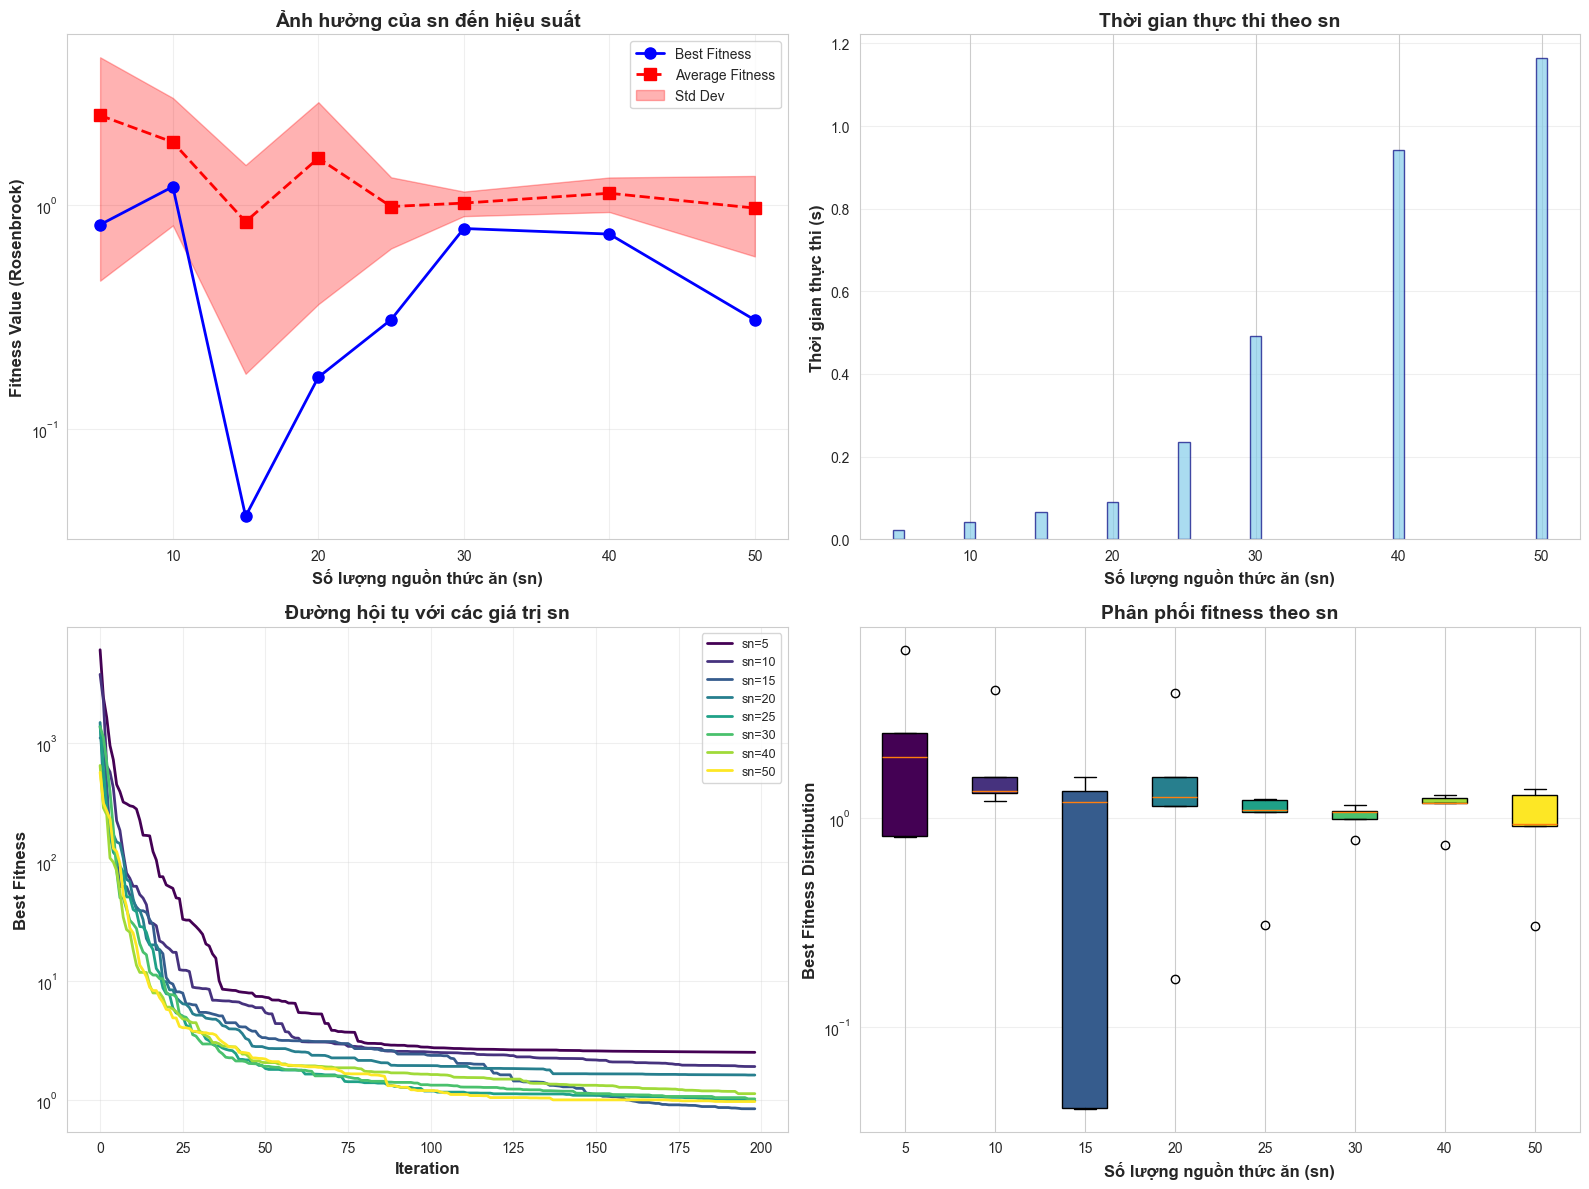

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

ax1 = axes[0, 0]
n_vals = [r["sn"] for r in results_sn]
best_vals = [r["best_fitness"] for r in results_sn]
avg_vals = [r["avg_fitness"] for r in results_sn]
std_vals = [r["std_fitness"] for r in results_sn]

ax1.plot(n_vals, best_vals, "bo-", linewidth=2, markersize=8, label="Best Fitness")
ax1.plot(n_vals, avg_vals, "rs--", linewidth=2, markersize=8, label="Average Fitness")
ax1.fill_between(
    n_vals,
    np.array(avg_vals) - np.array(std_vals),
    np.array(avg_vals) + np.array(std_vals),
    alpha=0.3,
    color="red",
    label="Std Dev",
)
ax1.set_xlabel("Số lượng nguồn thức ăn (sn)", fontsize=12, fontweight="bold")
ax1.set_ylabel("Fitness Value (Rosenbrock)", fontsize=12, fontweight="bold")
ax1.set_title("Ảnh hưởng của sn đến hiệu suất", fontsize=14, fontweight="bold")
ax1.legend(loc="best")
ax1.grid(True, alpha=0.3)
ax1.set_yscale("log")

ax2 = axes[0, 1]
time_vals = [r["avg_time"] for r in results_sn]
ax2.bar(n_vals, time_vals, color="skyblue", edgecolor="navy", alpha=0.7)
ax2.set_xlabel("Số lượng nguồn thức ăn (sn)", fontsize=12, fontweight="bold")
ax2.set_ylabel("Thời gian thực thi (s)", fontsize=12, fontweight="bold")
ax2.set_title("Thời gian thực thi theo sn", fontsize=14, fontweight="bold")
ax2.grid(True, alpha=0.3, axis="y")

ax3 = axes[1, 0]
colors = plt.cm.viridis(np.linspace(0, 1, len(results_sn)))
for i, result in enumerate(results_sn):
    avg_history = np.mean(result["convergence_history"], axis=0)
    ax3.plot(
        avg_history,
        color=colors[i],
        linewidth=2,
        label=f"sn={result['sn']}",
    )
ax3.set_xlabel("Iteration", fontsize=12, fontweight="bold")
ax3.set_ylabel("Best Fitness", fontsize=12, fontweight="bold")
ax3.set_title("Đường hội tụ với các giá trị sn", fontsize=14, fontweight="bold")
ax3.legend(loc="best", fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.set_yscale("log")

ax4 = axes[1, 1]
data_for_boxplot = [r["all_best_fitnesses"] for r in results_sn]
bp = ax4.boxplot(data_for_boxplot, labels=n_vals, patch_artist=True)
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)
ax4.set_xlabel("Số lượng nguồn thức ăn (sn)", fontsize=12, fontweight="bold")
ax4.set_ylabel("Best Fitness Distribution", fontsize=12, fontweight="bold")
ax4.set_title("Phân phối fitness theo sn", fontsize=14, fontweight="bold")
ax4.grid(True, alpha=0.3, axis="y")
ax4.set_yscale("log")

plt.tight_layout()
plt.show()

## 2. Phân tích độ nhạy của tham số `limit` (Abandonment Threshold)

In [24]:
limit_values = [20, 40, 60, 80, 100, 150, 200, 300]
results_limit = []

print("Đang test tham số limit...")
for lim in tqdm(limit_values):
    result = run_abc_rosenbrock(
        problem_num=problem_num,
        sn=20,
        limit=lim,
        mcn=mcn,
        num_runs=num_runs,
    )
    result["limit"] = lim
    results_limit.append(result)
    print(
        f"limit={lim}: Best={result['best_fitness']:.4f}, Avg={result['avg_fitness']:.4f}"
    )

Đang test tham số limit...


 12%|█▎        | 1/8 [00:02<00:18,  2.68s/it]

limit=20: Best=1.6427, Avg=2.0416


 25%|██▌       | 2/8 [00:05<00:15,  2.58s/it]

limit=40: Best=0.1010, Avg=1.1620


 38%|███▊      | 3/8 [00:07<00:12,  2.51s/it]

limit=60: Best=0.2580, Avg=1.2109


 50%|█████     | 4/8 [00:08<00:06,  1.72s/it]

limit=80: Best=0.0060, Avg=0.8370


 62%|██████▎   | 5/8 [00:08<00:03,  1.25s/it]

limit=100: Best=1.1544, Avg=1.3498


 75%|███████▌  | 6/8 [00:08<00:01,  1.03it/s]

limit=150: Best=0.0998, Avg=0.7011


 88%|████████▊ | 7/8 [00:09<00:00,  1.26it/s]

limit=200: Best=0.5271, Avg=0.9977


100%|██████████| 8/8 [00:09<00:00,  1.23s/it]

limit=300: Best=0.2796, Avg=1.0353


C:\Users\luuth\AppData\Local\Temp\ipykernel_18676\2043083360.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax3.boxplot(data_for_boxplot, labels=lim_vals, patch_artist=True)


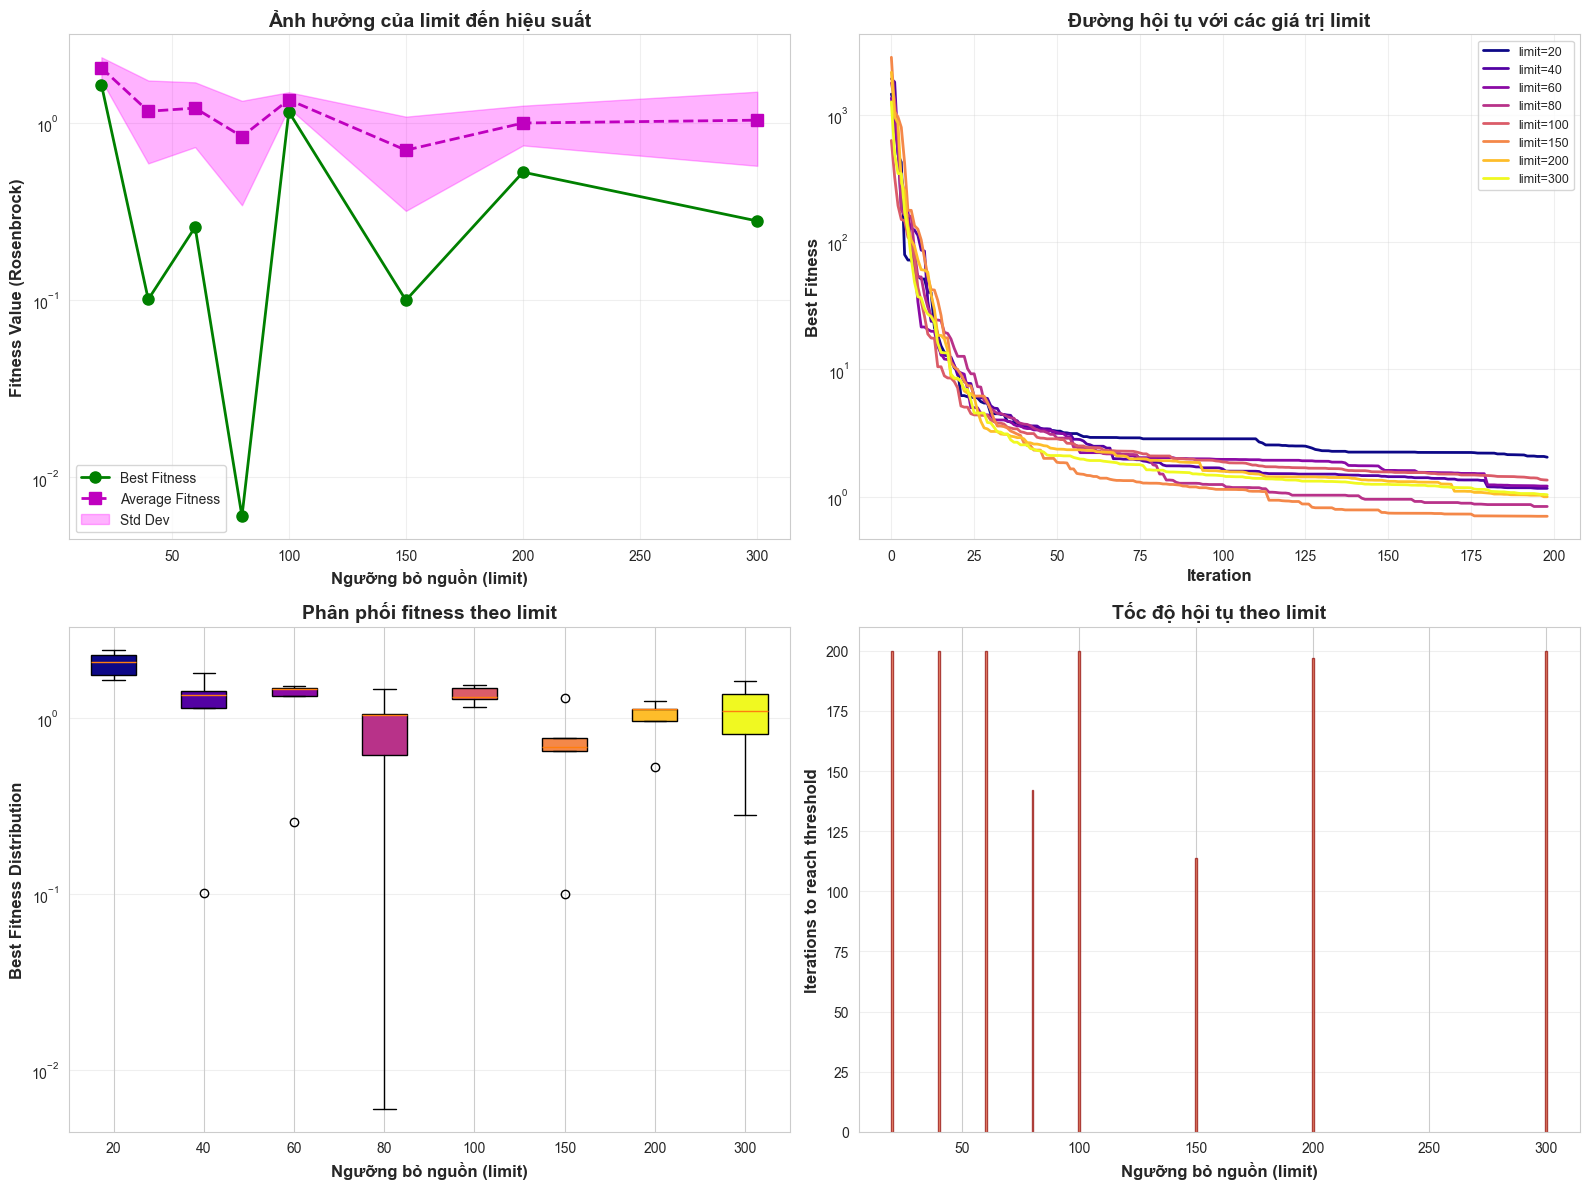

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

ax1 = axes[0, 0]
lim_vals = [r["limit"] for r in results_limit]
best_vals = [r["best_fitness"] for r in results_limit]
avg_vals = [r["avg_fitness"] for r in results_limit]
std_vals = [r["std_fitness"] for r in results_limit]

ax1.plot(lim_vals, best_vals, "go-", linewidth=2, markersize=8, label="Best Fitness")
ax1.plot(lim_vals, avg_vals, "ms--", linewidth=2, markersize=8, label="Average Fitness")
ax1.fill_between(
    lim_vals,
    np.array(avg_vals) - np.array(std_vals),
    np.array(avg_vals) + np.array(std_vals),
    alpha=0.3,
    color="magenta",
    label="Std Dev",
)
ax1.set_xlabel("Ngưỡng bỏ nguồn (limit)", fontsize=12, fontweight="bold")
ax1.set_ylabel("Fitness Value (Rosenbrock)", fontsize=12, fontweight="bold")
ax1.set_title("Ảnh hưởng của limit đến hiệu suất", fontsize=14, fontweight="bold")
ax1.legend(loc="best")
ax1.grid(True, alpha=0.3)
ax1.set_yscale("log")

ax2 = axes[0, 1]
colors = plt.cm.plasma(np.linspace(0, 1, len(results_limit)))
for i, result in enumerate(results_limit):
    avg_history = np.mean(result["convergence_history"], axis=0)
    ax2.plot(avg_history, color=colors[i], linewidth=2, label=f"limit={result['limit']}")
ax2.set_xlabel("Iteration", fontsize=12, fontweight="bold")
ax2.set_ylabel("Best Fitness", fontsize=12, fontweight="bold")
ax2.set_title("Đường hội tụ với các giá trị limit", fontsize=14, fontweight="bold")
ax2.legend(loc="best", fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_yscale("log")

ax3 = axes[1, 0]
data_for_boxplot = [r["all_best_fitnesses"] for r in results_limit]
bp = ax3.boxplot(data_for_boxplot, labels=lim_vals, patch_artist=True)
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)
ax3.set_xlabel("Ngưỡng bỏ nguồn (limit)", fontsize=12, fontweight="bold")
ax3.set_ylabel("Best Fitness Distribution", fontsize=12, fontweight="bold")
ax3.set_title("Phân phối fitness theo limit", fontsize=14, fontweight="bold")
ax3.grid(True, alpha=0.3, axis="y")
ax3.set_yscale("log")

ax4 = axes[1, 1]
threshold = 1.0
convergence_speeds = []
for result in results_limit:
    avg_history = np.mean(result["convergence_history"], axis=0)
    # Find when fitness value drops below threshold
    below_threshold = np.where(avg_history <= threshold)[0]
    iter_to_threshold = below_threshold[0] if len(below_threshold) > 0 else mcn
    convergence_speeds.append(iter_to_threshold)

ax4.bar(lim_vals, convergence_speeds, color="coral", edgecolor="darkred", alpha=0.7)
ax4.set_xlabel("Ngưỡng bỏ nguồn (limit)", fontsize=12, fontweight="bold")
ax4.set_ylabel("Iterations to reach threshold", fontsize=12, fontweight="bold")
ax4.set_title("Tốc độ hội tụ theo limit", fontsize=14, fontweight="bold")
ax4.grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

## 3. Phân tích độ nhạy của tham số `mcn` (Maximum Cycle Number)


In [26]:
mcn_values = [50, 100, 150, 200, 250, 300, 400, 500]
results_mcn = []

print("Đang test tham số mcn...")
for m in tqdm(mcn_values):
    result = run_abc_rosenbrock(
        problem_num=problem_num,
        sn=20,
        limit=100,
        mcn=m,
        num_runs=num_runs,
    )
    result["mcn"] = m
    results_mcn.append(result)
    print(
        f"mcn={m}: Best={result['best_fitness']:.4f}, Avg={result['avg_fitness']:.4f}"
    )


Đang test tham số mcn...


 12%|█▎        | 1/8 [00:00<00:00,  8.76it/s]

mcn=50: Best=1.5101, Avg=2.4590


 25%|██▌       | 2/8 [00:00<00:01,  5.51it/s]

mcn=100: Best=0.6022, Avg=1.4258


 38%|███▊      | 3/8 [00:00<00:01,  4.08it/s]

mcn=150: Best=0.2863, Avg=1.1998


 50%|█████     | 4/8 [00:01<00:01,  3.10it/s]

mcn=200: Best=0.0251, Avg=0.8953


 62%|██████▎   | 5/8 [00:01<00:01,  2.51it/s]

mcn=250: Best=0.3749, Avg=0.9729


 75%|███████▌  | 6/8 [00:02<00:00,  2.05it/s]

mcn=300: Best=0.0898, Avg=0.8953


 88%|████████▊ | 7/8 [00:03<00:00,  1.64it/s]

mcn=400: Best=0.8630, Avg=0.9219


100%|██████████| 8/8 [00:04<00:00,  1.87it/s]

mcn=500: Best=0.4055, Avg=0.5805


C:\Users\luuth\AppData\Local\Temp\ipykernel_18676\2561158645.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax3.boxplot(data_for_boxplot, labels=mcn_vals, patch_artist=True)


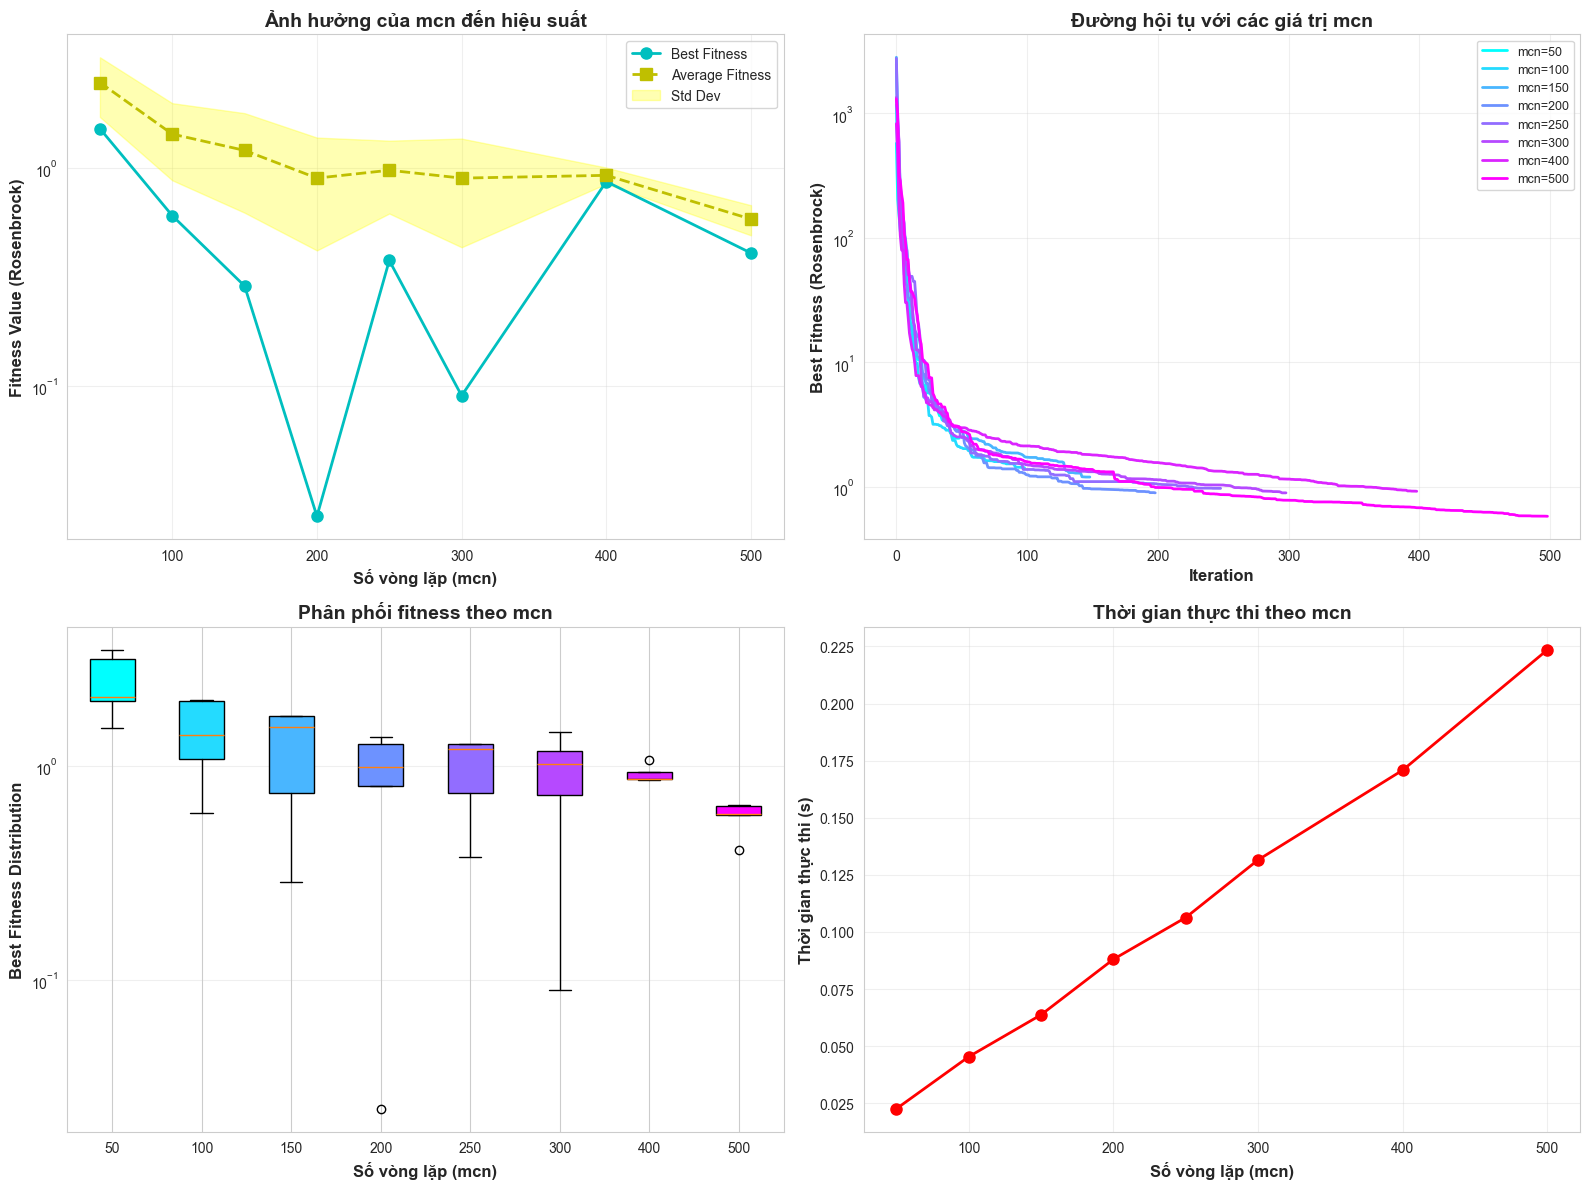

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

ax1 = axes[0, 0]
mcn_vals = [r["mcn"] for r in results_mcn]
best_vals = [r["best_fitness"] for r in results_mcn]
avg_vals = [r["avg_fitness"] for r in results_mcn]
std_vals = [r["std_fitness"] for r in results_mcn]

ax1.plot(mcn_vals, best_vals, "co-", linewidth=2, markersize=8, label="Best Fitness")
ax1.plot(mcn_vals, avg_vals, "ys--", linewidth=2, markersize=8, label="Average Fitness")
ax1.fill_between(
    mcn_vals,
    np.array(avg_vals) - np.array(std_vals),
    np.array(avg_vals) + np.array(std_vals),
    alpha=0.3,
    color="yellow",
    label="Std Dev",
)
ax1.set_xlabel("Số vòng lặp (mcn)", fontsize=12, fontweight="bold")
ax1.set_ylabel("Fitness Value (Rosenbrock)", fontsize=12, fontweight="bold")
ax1.set_title("Ảnh hưởng của mcn đến hiệu suất", fontsize=14, fontweight="bold")
ax1.legend(loc="best")
ax1.grid(True, alpha=0.3)
ax1.set_yscale("log")

ax2 = axes[0, 1]
colors = plt.cm.cool(np.linspace(0, 1, len(results_mcn)))
for i, result in enumerate(results_mcn):
    avg_history = np.mean(result["convergence_history"], axis=0)
    ax2.plot(avg_history, color=colors[i], linewidth=2, label=f"mcn={result['mcn']}")
ax2.set_xlabel("Iteration", fontsize=12, fontweight="bold")
ax2.set_ylabel("Best Fitness (Rosenbrock)", fontsize=12, fontweight="bold")
ax2.set_title("Đường hội tụ với các giá trị mcn", fontsize=14, fontweight="bold")
ax2.legend(loc="best", fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_yscale("log")

ax3 = axes[1, 0]
data_for_boxplot = [r["all_best_fitnesses"] for r in results_mcn]
bp = ax3.boxplot(data_for_boxplot, labels=mcn_vals, patch_artist=True)
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)
ax3.set_xlabel("Số vòng lặp (mcn)", fontsize=12, fontweight="bold")
ax3.set_ylabel("Best Fitness Distribution", fontsize=12, fontweight="bold")
ax3.set_title("Phân phối fitness theo mcn", fontsize=14, fontweight="bold")
ax3.grid(True, alpha=0.3, axis="y")
ax3.set_yscale("log")

ax4 = axes[1, 1]
time_vals = [r["avg_time"] for r in results_mcn]
ax4.plot(mcn_vals, time_vals, "ro-", linewidth=2, markersize=8)
ax4.set_xlabel("Số vòng lặp (mcn)", fontsize=12, fontweight="bold")
ax4.set_ylabel("Thời gian thực thi (s)", fontsize=12, fontweight="bold")
ax4.set_title("Thời gian thực thi theo mcn", fontsize=14, fontweight="bold")
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 4. Phân tích tương tác giữa các tham số (Heatmap sn vs limit)


In [28]:
sn_test = [10, 15, 20, 25, 30]
limit_test = [40, 60, 80, 100, 150]

heatmap_data = np.zeros((len(sn_test), len(limit_test)))

print("Đang test tương tác sn-limit...")
for i, n in enumerate(tqdm(sn_test)):
    for j, lim in enumerate(limit_test):
        result = run_abc_rosenbrock(
            problem_num=problem_num,
            sn=n,
            limit=lim,
            mcn=200,
            num_runs=3,
        )
        heatmap_data[i, j] = result["avg_fitness"]
        print(f"sn={n}, limit={lim}: Avg={result['avg_fitness']:.4f}")


Đang test tương tác sn-limit...


  0%|          | 0/5 [00:00<?, ?it/s]

sn=10, limit=40: Avg=1.4146
sn=10, limit=60: Avg=0.5808
sn=10, limit=60: Avg=0.5808
sn=10, limit=80: Avg=1.0841
sn=10, limit=80: Avg=1.0841
sn=10, limit=100: Avg=1.3694
sn=10, limit=100: Avg=1.3694


 20%|██        | 1/5 [00:00<00:02,  1.51it/s]

sn=10, limit=150: Avg=0.9027
sn=15, limit=40: Avg=1.3430
sn=15, limit=40: Avg=1.3430
sn=15, limit=60: Avg=1.7866
sn=15, limit=80: Avg=0.3308
sn=15, limit=60: Avg=1.7866
sn=15, limit=80: Avg=0.3308


 40%|████      | 2/5 [00:01<00:02,  1.17it/s]

sn=15, limit=100: Avg=0.5157
sn=15, limit=150: Avg=1.1264
sn=20, limit=40: Avg=1.1020
sn=20, limit=40: Avg=1.1020
sn=20, limit=60: Avg=0.6833
sn=20, limit=60: Avg=0.6833
sn=20, limit=80: Avg=0.4095
sn=20, limit=80: Avg=0.4095
sn=20, limit=100: Avg=1.2063
sn=20, limit=100: Avg=1.2063


 60%|██████    | 3/5 [00:02<00:02,  1.07s/it]

sn=20, limit=150: Avg=1.4877
sn=25, limit=40: Avg=1.6058
sn=25, limit=40: Avg=1.6058
sn=25, limit=60: Avg=1.3802
sn=25, limit=60: Avg=1.3802
sn=25, limit=80: Avg=0.8932
sn=25, limit=80: Avg=0.8932
sn=25, limit=100: Avg=1.1703
sn=25, limit=100: Avg=1.1703


 80%|████████  | 4/5 [00:04<00:01,  1.32s/it]

sn=25, limit=150: Avg=1.0114
sn=30, limit=40: Avg=1.3910
sn=30, limit=40: Avg=1.3910
sn=30, limit=60: Avg=0.5190
sn=30, limit=60: Avg=0.5190
sn=30, limit=80: Avg=1.6902
sn=30, limit=80: Avg=1.6902
sn=30, limit=100: Avg=1.0881
sn=30, limit=100: Avg=1.0881


100%|██████████| 5/5 [00:06<00:00,  1.32s/it]

sn=30, limit=150: Avg=0.9212


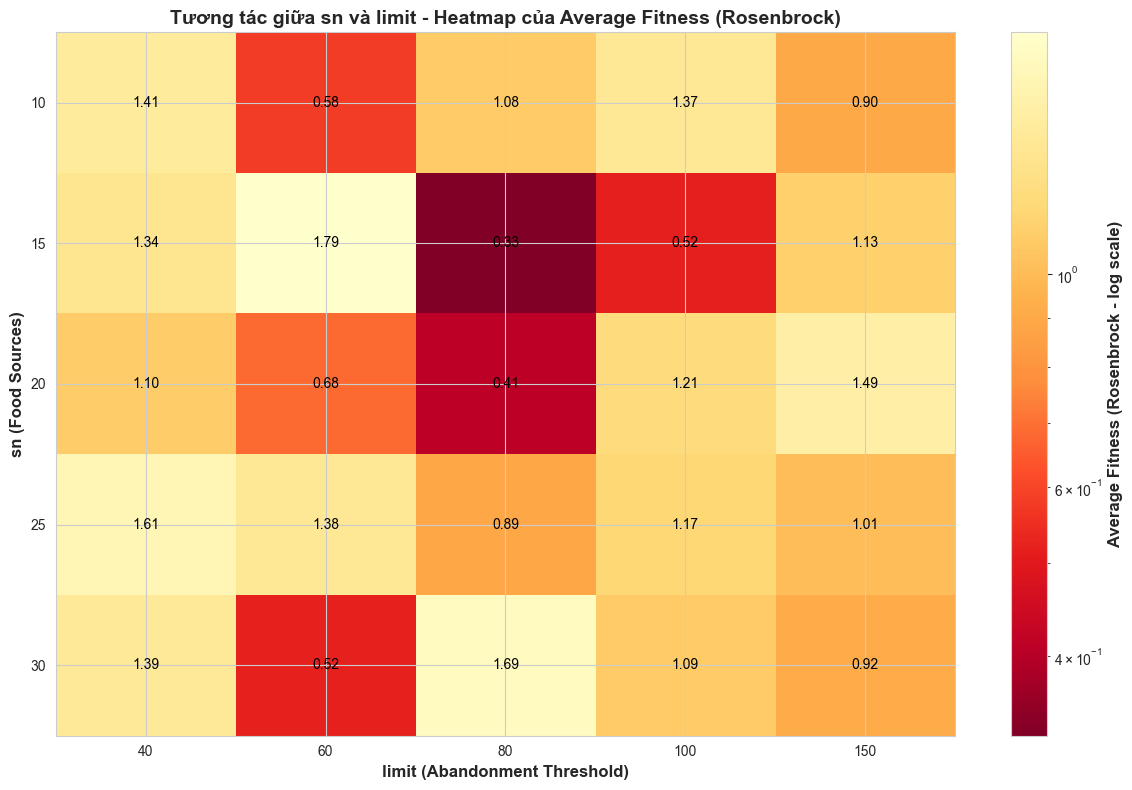

In [29]:
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(12, 8))

vmin = np.maximum(heatmap_data.min(), 1e-10)
vmax = heatmap_data.max()

im = ax.imshow(
    heatmap_data,
    cmap="YlOrRd_r",
    aspect="auto",
    norm=colors.LogNorm(vmin=vmin, vmax=vmax),
)

ax.set_xticks(np.arange(len(limit_test)))
ax.set_yticks(np.arange(len(sn_test)))
ax.set_xticklabels(limit_test)
ax.set_yticklabels(sn_test)

cbar = plt.colorbar(im, ax=ax)
cbar.set_label(
    "Average Fitness (Rosenbrock - log scale)", fontsize=12, fontweight="bold"
)

for i in range(len(sn_test)):
    for j in range(len(limit_test)):
        text = ax.text(
            j,
            i,
            f"{heatmap_data[i, j]:.2f}",
            ha="center",
            va="center",
            color="black",
            fontsize=10,
        )

ax.set_xlabel("limit (Abandonment Threshold)", fontsize=12, fontweight="bold")
ax.set_ylabel("sn (Food Sources)", fontsize=12, fontweight="bold")
ax.set_title(
    "Tương tác giữa sn và limit - Heatmap của Average Fitness (Rosenbrock)",
    fontsize=14,
    fontweight="bold",
)

plt.tight_layout()
plt.show()


## 5. So sánh hiệu suất trên nhiều test cases

In [30]:
test_cases = [1, 2, 3, 4, 5]
optimal_params = {
    "sn": 20,
    "limit": 100,
}

results_test_cases = []

print("Đang test trên nhiều test cases với tham số tối ưu...")
for test_num in tqdm(test_cases):
    result = run_abc_rosenbrock(
        problem_num=test_num,
        sn=optimal_params["sn"],
        limit=optimal_params["limit"],
        mcn=mcn,
        num_runs=num_runs,
    )
    result["test_case"] = test_num
    results_test_cases.append(result)
    print(
        f"Test {test_num}: Best={result['best_fitness']:.4f}, Avg={result['avg_fitness']:.4f}"
    )

Đang test trên nhiều test cases với tham số tối ưu...


 20%|██        | 1/5 [00:00<00:01,  2.33it/s]

Test 1: Best=0.0340, Avg=0.9925


 40%|████      | 2/5 [00:00<00:01,  2.33it/s]

Test 2: Best=0.7811, Avg=1.2605


 60%|██████    | 3/5 [00:01<00:00,  2.32it/s]

Test 3: Best=0.2798, Avg=1.0855


 80%|████████  | 4/5 [00:01<00:00,  2.30it/s]

Test 4: Best=0.0748, Avg=0.8487


100%|██████████| 5/5 [00:02<00:00,  2.31it/s]

Test 5: Best=0.1013, Avg=0.9159


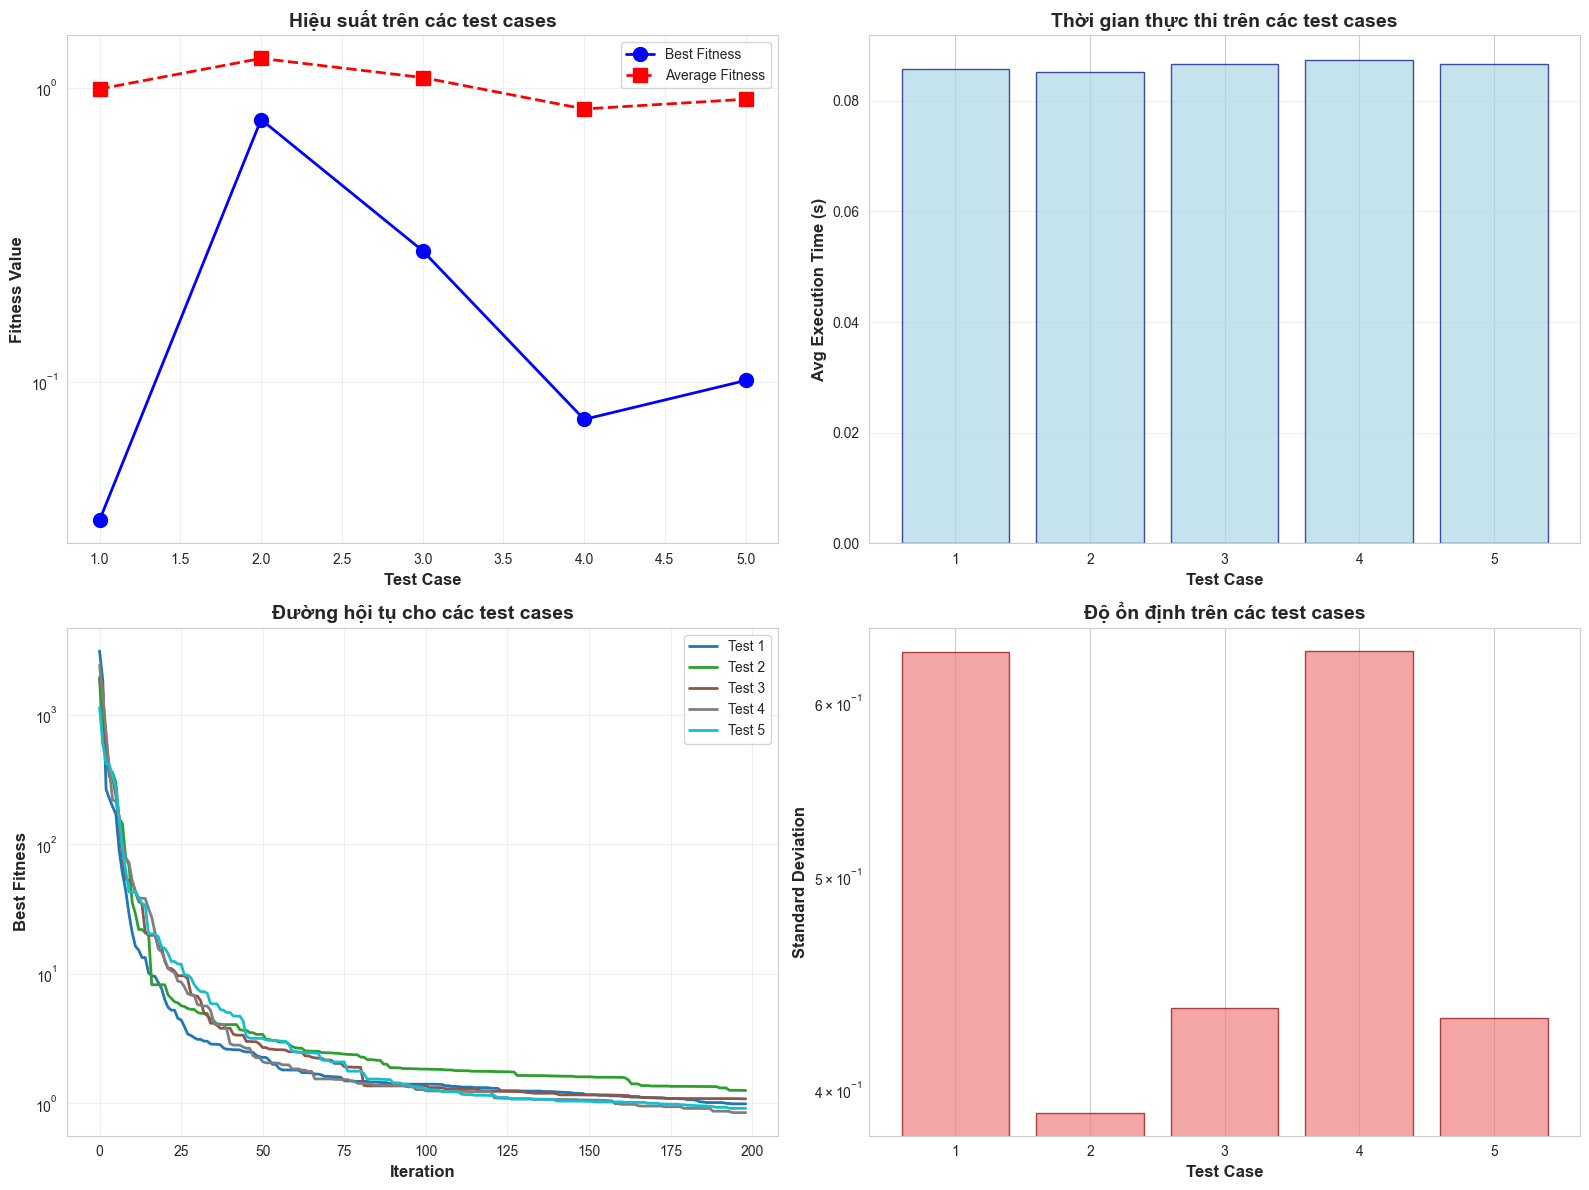

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

ax1 = axes[0, 0]
test_nums = [r["test_case"] for r in results_test_cases]
best_vals = [r["best_fitness"] for r in results_test_cases]
avg_vals = [r["avg_fitness"] for r in results_test_cases]

ax1.plot(test_nums, best_vals, "bo-", linewidth=2, markersize=10, label="Best Fitness")
ax1.plot(
    test_nums, avg_vals, "rs--", linewidth=2, markersize=10, label="Average Fitness"
)
ax1.set_xlabel("Test Case", fontsize=12, fontweight="bold")
ax1.set_ylabel("Fitness Value", fontsize=12, fontweight="bold")
ax1.set_title("Hiệu suất trên các test cases", fontsize=14, fontweight="bold")
ax1.legend(loc="best")
ax1.grid(True, alpha=0.3)
ax1.set_yscale("log")

ax2 = axes[0, 1]
time_vals = [r["avg_time"] for r in results_test_cases]
ax2.bar(test_nums, time_vals, color="lightblue", edgecolor="navy", alpha=0.7)
ax2.set_xlabel("Test Case", fontsize=12, fontweight="bold")
ax2.set_ylabel("Avg Execution Time (s)", fontsize=12, fontweight="bold")
ax2.set_title("Thời gian thực thi trên các test cases", fontsize=14, fontweight="bold")
ax2.grid(True, alpha=0.3, axis="y")

ax3 = axes[1, 0]
colors = plt.cm.tab10(np.linspace(0, 1, len(results_test_cases)))
for i, result in enumerate(results_test_cases):
    avg_history = np.mean(result["convergence_history"], axis=0)
    ax3.plot(
        avg_history,
        color=colors[i],
        linewidth=2,
        label=f"Test {result['test_case']}",
    )
ax3.set_xlabel("Iteration", fontsize=12, fontweight="bold")
ax3.set_ylabel("Best Fitness", fontsize=12, fontweight="bold")
ax3.set_title("Đường hội tụ cho các test cases", fontsize=14, fontweight="bold")
ax3.legend(loc="best")
ax3.grid(True, alpha=0.3)
ax3.set_yscale("log")

ax4 = axes[1, 1]
std_vals = [r["std_fitness"] for r in results_test_cases]
ax4.bar(test_nums, std_vals, color="lightcoral", edgecolor="darkred", alpha=0.7)
ax4.set_xlabel("Test Case", fontsize=12, fontweight="bold")
ax4.set_ylabel("Standard Deviation", fontsize=12, fontweight="bold")
ax4.set_title("Độ ổn định trên các test cases", fontsize=14, fontweight="bold")
ax4.grid(True, alpha=0.3, axis="y")
ax4.set_yscale("log")

plt.tight_layout()
plt.show()

## 6. Kết luận và Khuyến nghị

### Kết quả phân tích các tham số:

#### **1. Tham số `sn` (Food Sources)**
- **Quan sát**: 
  - sn nhỏ (5-10): Hội tụ nhanh nhưng kết quả kém, dễ bị kẹt local optima
  - sn vừa (15-25): Cân bằng tốt giữa exploration và exploitation
  - sn lớn (40-50): Tăng khả năng tìm global optima nhưng tốn thời gian
- **Khuyến nghị**: `sn = 20-25` cho Rosenbrock function

#### **2. Tham số `limit` (Abandonment Threshold)**
- **Quan sát**:
  - limit thấp (20-40): Scout bees hoạt động tích cực, tăng exploration nhưng không ổn định
  - limit trung bình (60-100): Cân bằng giữa exploitation và exploration
  - limit cao (150-300): Ít bỏ nguồn, tập trung exploitation có thể kẹt local optima
- **Khuyến nghị**: `limit = 80-100` cho Rosenbrock function

#### **3. Tham số `mcn` (Maximum Cycle Number)**
- **Quan sát**:
  - mcn thấp (50-100): Không đủ thời gian để hội tụ, kết quả kém
  - mcn trung bình (150-250): Đủ để thuật toán hội tụ tốt
  - mcn cao (300-500): Cải thiện ít nhưng tốn thời gian
- **Khuyến nghị**: `mcn = 200-250` cho Rosenbrock function

#### **4. Tương tác giữa các tham số**
- sn và limit có tương tác với nhau
- Vùng tối ưu: sn = 20-25, limit = 80-100, mcn = 200-250
- sn cao + limit thấp: Tốt cho exploration
- sn thấp + limit cao: Kém hiệu quả, dễ kẹt

### **Cấu hình tối ưu đề xuất cho Rosenbrock Function:**

```python
optimal_config = {
    "sn": 20,        # Đủ diversity mà không quá tốn thời gian
    "limit": 100,    # Cân bằng exploration/exploitation
    "mcn": 200       # Đủ để hội tụ
}
```

### **Đặc điểm Rosenbrock Function:**
- **Thung lũng hẹp và cong**: Cần cân bằng giữa local search (employed/onlooker) và global search (scout)
- **Gradient thoai thoải**: limit vừa phải để không bỏ nguồn tốt quá sớm
- **Global optimum tại (1,1,...,1)**: Cần kiên nhẫn khai thác vùng thung lũng
- **Khó khăn**: Dễ tìm thung lũng nhưng khó di chuyển đến đáy

### **So sánh với các bài toán khác:**
- **Ackley**: Cần limit thấp hơn (50-80) do nhiều local optima
- **Knapsack**: Cần sn lớn hơn (30-40) do không gian rời rạc
- **Rosenbrock**: sn = 20, limit = 100, mcn = 200 cân bằng tốt

## 7. Visualization: Rosenbrock Function Landscape


C:\Users\luuth\AppData\Local\Temp\ipykernel_18676\4135679109.py:63: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\luuth\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\luuth\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


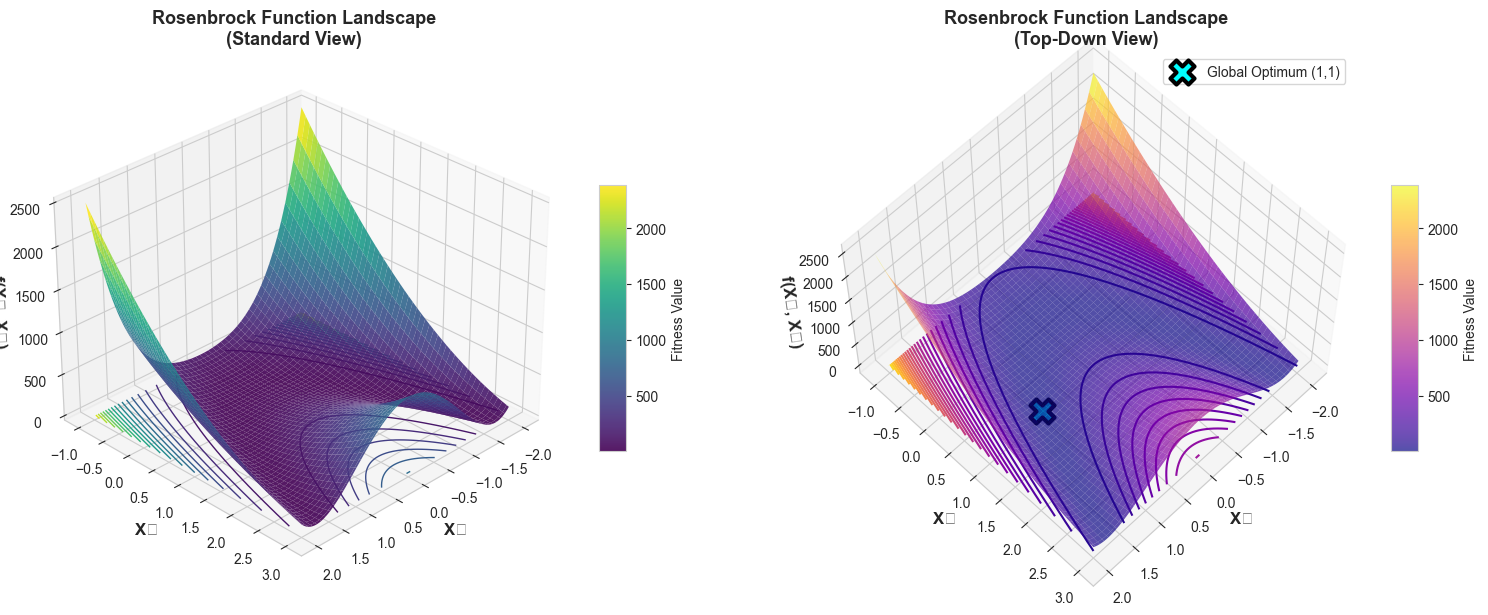


🔍 Quan sát về Rosenbrock Function:
- Global minimum tại (1, 1) với f(1,1) = 0
- Có hình dạng 'banana valley' - thung lũng hẹp và cong
- Gradient thoai thoải dẫn đến optimum
- Đây là lý do tại sao cần:
  + limit vừa phải (80-100): không bỏ nguồn tốt quá sớm trong valley
  + sn đủ lớn (20-25): để explore nhiều hướng trong valley
  + mcn đủ (200-250): để có thời gian di chuyển dọc valley


In [32]:
# Define 2D Rosenbrock function for visualization
def rosenbrock_function_2d(x, y):
    """2D Rosenbrock function: f(x,y) = 100(y - x²)² + (1 - x)²"""
    return 100 * (y - x**2) ** 2 + (1 - x) ** 2


# Create 3D visualization of Rosenbrock landscape
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 6))

# View 1: Standard 3D surface
ax1 = fig.add_subplot(121, projection="3d")

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_function_2d(X, Y)

surf1 = ax1.plot_surface(X, Y, Z, cmap="viridis", alpha=0.9, antialiased=True, edgecolor="none")
ax1.contour(X, Y, Z, levels=20, cmap="viridis", linewidths=1, offset=0)

ax1.set_xlabel("X₁", fontsize=12, fontweight="bold")
ax1.set_ylabel("X₂", fontsize=12, fontweight="bold")
ax1.set_zlabel("f(X₁, X₂)", fontsize=12, fontweight="bold")
ax1.set_title(
    "Rosenbrock Function Landscape\n(Standard View)", fontsize=13, fontweight="bold"
)
ax1.view_init(elev=30, azim=45)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10, label="Fitness Value")

# View 2: Top-down view (Contour)
ax2 = fig.add_subplot(122, projection="3d")
surf2 = ax2.plot_surface(X, Y, Z, cmap="plasma", alpha=0.7, edgecolor="none")

# Add contour at different levels
ax2.contour(X, Y, Z, levels=30, cmap="plasma", linewidths=1.5, offset=0)

# Mark global optimum
ax2.scatter(
    [1],
    [1],
    [0],
    c="cyan",
    s=300,
    marker="X",
    edgecolor="black",
    linewidth=3,
    label="Global Optimum (1,1)",
    zorder=100,
)

ax2.set_xlabel("X₁", fontsize=12, fontweight="bold")
ax2.set_ylabel("X₂", fontsize=12, fontweight="bold")
ax2.set_zlabel("f(X₁, X₂)", fontsize=12, fontweight="bold")
ax2.set_title(
    "Rosenbrock Function Landscape\n(Top-Down View)", fontsize=13, fontweight="bold"
)
ax2.view_init(elev=60, azim=45)  # Top-down view
ax2.legend(loc="upper right", fontsize=10)
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=10, label="Fitness Value")

plt.tight_layout()
plt.show()

print("\n🔍 Quan sát về Rosenbrock Function:")
print("- Global minimum tại (1, 1) với f(1,1) = 0")
print("- Có hình dạng 'banana valley' - thung lũng hẹp và cong")
print("- Gradient thoai thoải dẫn đến optimum")
print("- Đây là lý do tại sao cần:")
print("  + limit vừa phải (80-100): không bỏ nguồn tốt quá sớm trong valley")
print("  + sn đủ lớn (20-25): để explore nhiều hướng trong valley")
print("  + mcn đủ (200-250): để có thời gian di chuyển dọc valley")


---
---
---

# ABC Algorithm - Parameter Analysis on Knapsack Problem

Knapsack là bài toán tối ưu tổ hợp với không gian tìm kiếm **rời rạc** (binary), khác hoàn toàn với Rosenbrock (continuous).

**Thách thức:**
- Không gian binary: solution ∈ {0,1}^n
- Ràng buộc dung lượng: Σ(w_i * x_i) ≤ capacity
- Cần local search function đặc biệt cho binary space


In [33]:
def knapsack_local_search(solutions, i, lb, ub):
    """
    Binary local search for knapsack problem.
    Flip random bits with some probability.
    """
    new_solution = solutions[i].copy()
    n = len(new_solution)
    
    # Randomly flip 1-3 bits
    num_flips = np.random.randint(1, min(4, n+1))
    flip_indices = np.random.choice(n, num_flips, replace=False)
    
    for idx in flip_indices:
        new_solution[idx] = 1 - new_solution[idx]
    
    return new_solution


def run_abc_knapsack(
    problem_num,
    sn=20,
    limit=100,
    mcn=200,
    num_runs=5,
):
    """
    Run ABC on Knapsack problem.
    
    Returns:
        Dictionary with results
    """
    knapsack_folder = os.path.join(DATASET_FOLDER, "knapsack/")
    knapsack = Knapsack(PROBLEM_FOLDER=knapsack_folder, PROBLEM=problem_num)
    
    # Get number of items
    n_items = len(knapsack.items)
    
    best_values = []
    convergence_histories = []
    execution_times = []
    
    for run in range(num_runs):
        # Initialize ABC for binary problem
        abc = ABC(
            dimension=n_items,
            sn=sn,
            mcn=mcn,
            limit=limit,
            lb=0.0,
            ub=1.0,
        )
        
        # Set objective function (knapsack returns profit directly)
        abc.set_objective_function(knapsack.calculate_fitness)
        
        # Set binary local search
        abc.set_local_search(knapsack_local_search)
        
        # Override initial solutions to be binary
        abc.solutions = np.random.randint(0, 2, size=(sn, n_items)).astype(float)
        
        # Run algorithm
        start_time = time.time()
        best_solution, best_fitness, history = abc.run(visualize=False)
        end_time = time.time()
        
        # Convert fitness back to profit
        # Knapsack.calculate_fitness returns profit directly (0 if over capacity)
        best_profit = knapsack.calculate_fitness(best_solution)
        
        # Convert history (fitness values) to profit values
        profit_history = []
        for f in history:
            # fitness = 1/(1+value) for minimization
            # For knapsack: value = -profit (we minimize negative profit)
            # So: profit = -(1/fitness - 1) = 1 - 1/fitness
            if f > 0:
                profit = 1 - 1/f
            else:
                profit = float('-inf')
            profit_history.append(profit)
        
        best_values.append(best_profit)
        convergence_histories.append(profit_history)
        execution_times.append(end_time - start_time)
    
    return {
        "best_fitness": np.max(best_values),  # Max profit is best
        "avg_fitness": np.mean(best_values),
        "std_fitness": np.std(best_values),
        "convergence_history": convergence_histories,
        "avg_time": np.mean(execution_times),
        "all_best_fitnesses": best_values,
    }


## 1. Phân tích độ nhạy của tham số `sn` trên Knapsack


In [34]:
knapsack_problem_num = 1
sn_values_ks = [10, 20, 30, 40, 50, 60]
mcn_ks = 200
num_runs_ks = 5

results_sn_ks = []

print("Đang test tham số sn trên Knapsack...")
for n in tqdm(sn_values_ks):
    result = run_abc_knapsack(
        problem_num=knapsack_problem_num,
        sn=n,
        limit=100,
        mcn=mcn_ks,
        num_runs=num_runs_ks,
    )
    result["sn"] = n
    results_sn_ks.append(result)
    print(
        f"sn={n}: Best={result['best_fitness']:.2f}, Avg={result['avg_fitness']:.2f}, Time={result['avg_time']:.3f}s"
    )


Đang test tham số sn trên Knapsack...


 17%|█▋        | 1/6 [00:00<00:01,  4.83it/s]

sn=10: Best=0.00, Avg=0.00, Time=0.041s


 33%|███▎      | 2/6 [00:00<00:01,  3.08it/s]

sn=20: Best=0.00, Avg=0.00, Time=0.081s


 50%|█████     | 3/6 [00:01<00:01,  2.23it/s]

sn=30: Best=0.00, Avg=0.00, Time=0.119s


 67%|██████▋   | 4/6 [00:02<00:01,  1.71it/s]

sn=40: Best=0.00, Avg=0.00, Time=0.159s


 83%|████████▎ | 5/6 [00:02<00:00,  1.38it/s]

sn=50: Best=0.00, Avg=0.00, Time=0.194s


100%|██████████| 6/6 [00:04<00:00,  1.44it/s]

sn=60: Best=0.00, Avg=0.00, Time=0.236s


C:\Users\luuth\AppData\Local\Temp\ipykernel_18676\941379638.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot(data_for_boxplot, labels=n_vals, patch_artist=True)


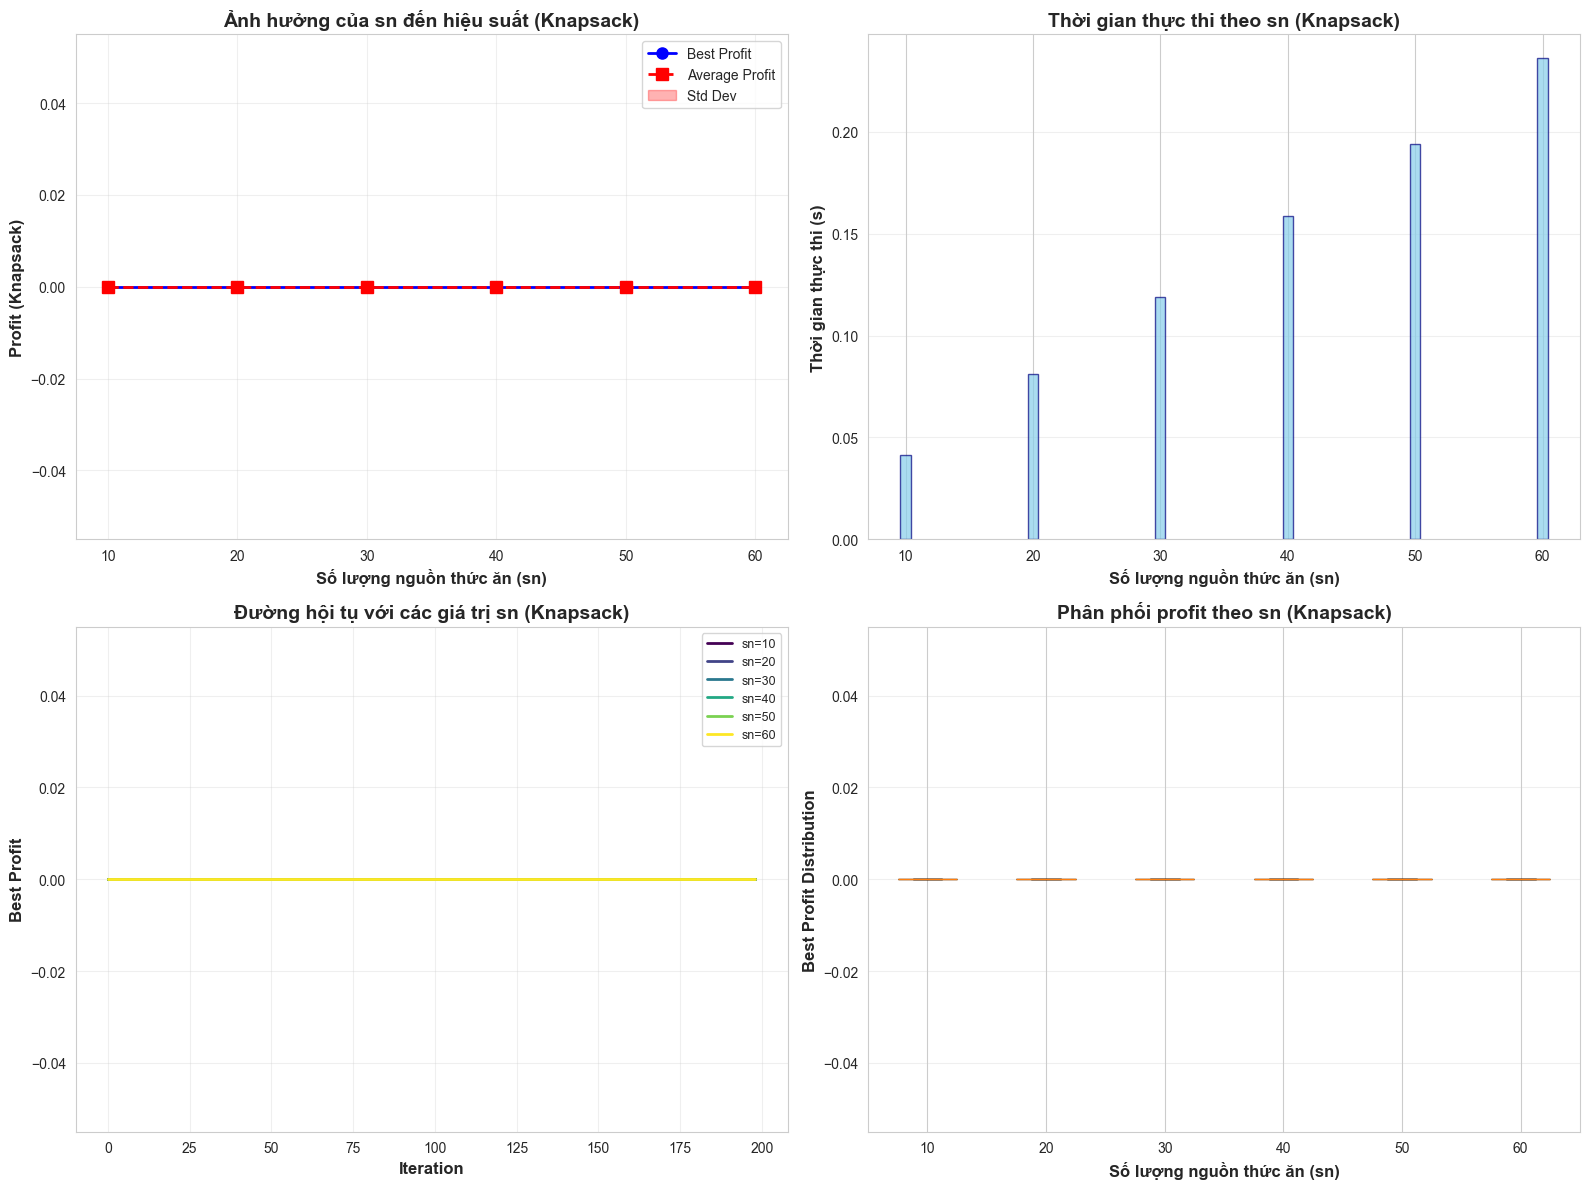

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

ax1 = axes[0, 0]
n_vals = [r["sn"] for r in results_sn_ks]
best_vals = [r["best_fitness"] for r in results_sn_ks]
avg_vals = [r["avg_fitness"] for r in results_sn_ks]
std_vals = [r["std_fitness"] for r in results_sn_ks]

ax1.plot(n_vals, best_vals, "bo-", linewidth=2, markersize=8, label="Best Profit")
ax1.plot(n_vals, avg_vals, "rs--", linewidth=2, markersize=8, label="Average Profit")
ax1.fill_between(
    n_vals,
    np.array(avg_vals) - np.array(std_vals),
    np.array(avg_vals) + np.array(std_vals),
    alpha=0.3,
    color="red",
    label="Std Dev",
)
ax1.set_xlabel("Số lượng nguồn thức ăn (sn)", fontsize=12, fontweight="bold")
ax1.set_ylabel("Profit (Knapsack)", fontsize=12, fontweight="bold")
ax1.set_title("Ảnh hưởng của sn đến hiệu suất (Knapsack)", fontsize=14, fontweight="bold")
ax1.legend(loc="best")
ax1.grid(True, alpha=0.3)

ax2 = axes[0, 1]
time_vals = [r["avg_time"] for r in results_sn_ks]
ax2.bar(n_vals, time_vals, color="skyblue", edgecolor="navy", alpha=0.7)
ax2.set_xlabel("Số lượng nguồn thức ăn (sn)", fontsize=12, fontweight="bold")
ax2.set_ylabel("Thời gian thực thi (s)", fontsize=12, fontweight="bold")
ax2.set_title("Thời gian thực thi theo sn (Knapsack)", fontsize=14, fontweight="bold")
ax2.grid(True, alpha=0.3, axis="y")

ax3 = axes[1, 0]
colors = plt.cm.viridis(np.linspace(0, 1, len(results_sn_ks)))
for i, result in enumerate(results_sn_ks):
    avg_history = np.mean(result["convergence_history"], axis=0)
    ax3.plot(
        avg_history,
        color=colors[i],
        linewidth=2,
        label=f"sn={result['sn']}",
    )
ax3.set_xlabel("Iteration", fontsize=12, fontweight="bold")
ax3.set_ylabel("Best Profit", fontsize=12, fontweight="bold")
ax3.set_title("Đường hội tụ với các giá trị sn (Knapsack)", fontsize=14, fontweight="bold")
ax3.legend(loc="best", fontsize=9)
ax3.grid(True, alpha=0.3)

ax4 = axes[1, 1]
data_for_boxplot = [r["all_best_fitnesses"] for r in results_sn_ks]
bp = ax4.boxplot(data_for_boxplot, labels=n_vals, patch_artist=True)
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)
ax4.set_xlabel("Số lượng nguồn thức ăn (sn)", fontsize=12, fontweight="bold")
ax4.set_ylabel("Best Profit Distribution", fontsize=12, fontweight="bold")
ax4.set_title("Phân phối profit theo sn (Knapsack)", fontsize=14, fontweight="bold")
ax4.grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()


## 2. Phân tích độ nhạy của tham số `limit` trên Knapsack


In [36]:
limit_values_ks = [20, 40, 60, 80, 100, 150, 200]
results_limit_ks = []

print("Đang test tham số limit trên Knapsack...")
for lim in tqdm(limit_values_ks):
    result = run_abc_knapsack(
        problem_num=knapsack_problem_num,
        sn=30,
        limit=lim,
        mcn=mcn_ks,
        num_runs=num_runs_ks,
    )
    result["limit"] = lim
    results_limit_ks.append(result)
    print(
        f"limit={lim}: Best={result['best_fitness']:.2f}, Avg={result['avg_fitness']:.2f}"
    )


Đang test tham số limit trên Knapsack...


 14%|█▍        | 1/7 [00:00<00:03,  1.62it/s]

limit=20: Best=0.00, Avg=0.00


 29%|██▊       | 2/7 [00:01<00:03,  1.63it/s]

limit=40: Best=0.00, Avg=0.00


 43%|████▎     | 3/7 [00:01<00:02,  1.63it/s]

limit=60: Best=0.00, Avg=0.00


 57%|█████▋    | 4/7 [00:02<00:01,  1.64it/s]

limit=80: Best=0.00, Avg=0.00


 71%|███████▏  | 5/7 [00:03<00:01,  1.65it/s]

limit=100: Best=0.00, Avg=0.00


 86%|████████▌ | 6/7 [00:03<00:00,  1.66it/s]

limit=150: Best=0.00, Avg=0.00


100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

limit=200: Best=0.00, Avg=0.00


C:\Users\luuth\AppData\Local\Temp\ipykernel_18676\565489836.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax3.boxplot(data_for_boxplot, labels=lim_vals, patch_artist=True)


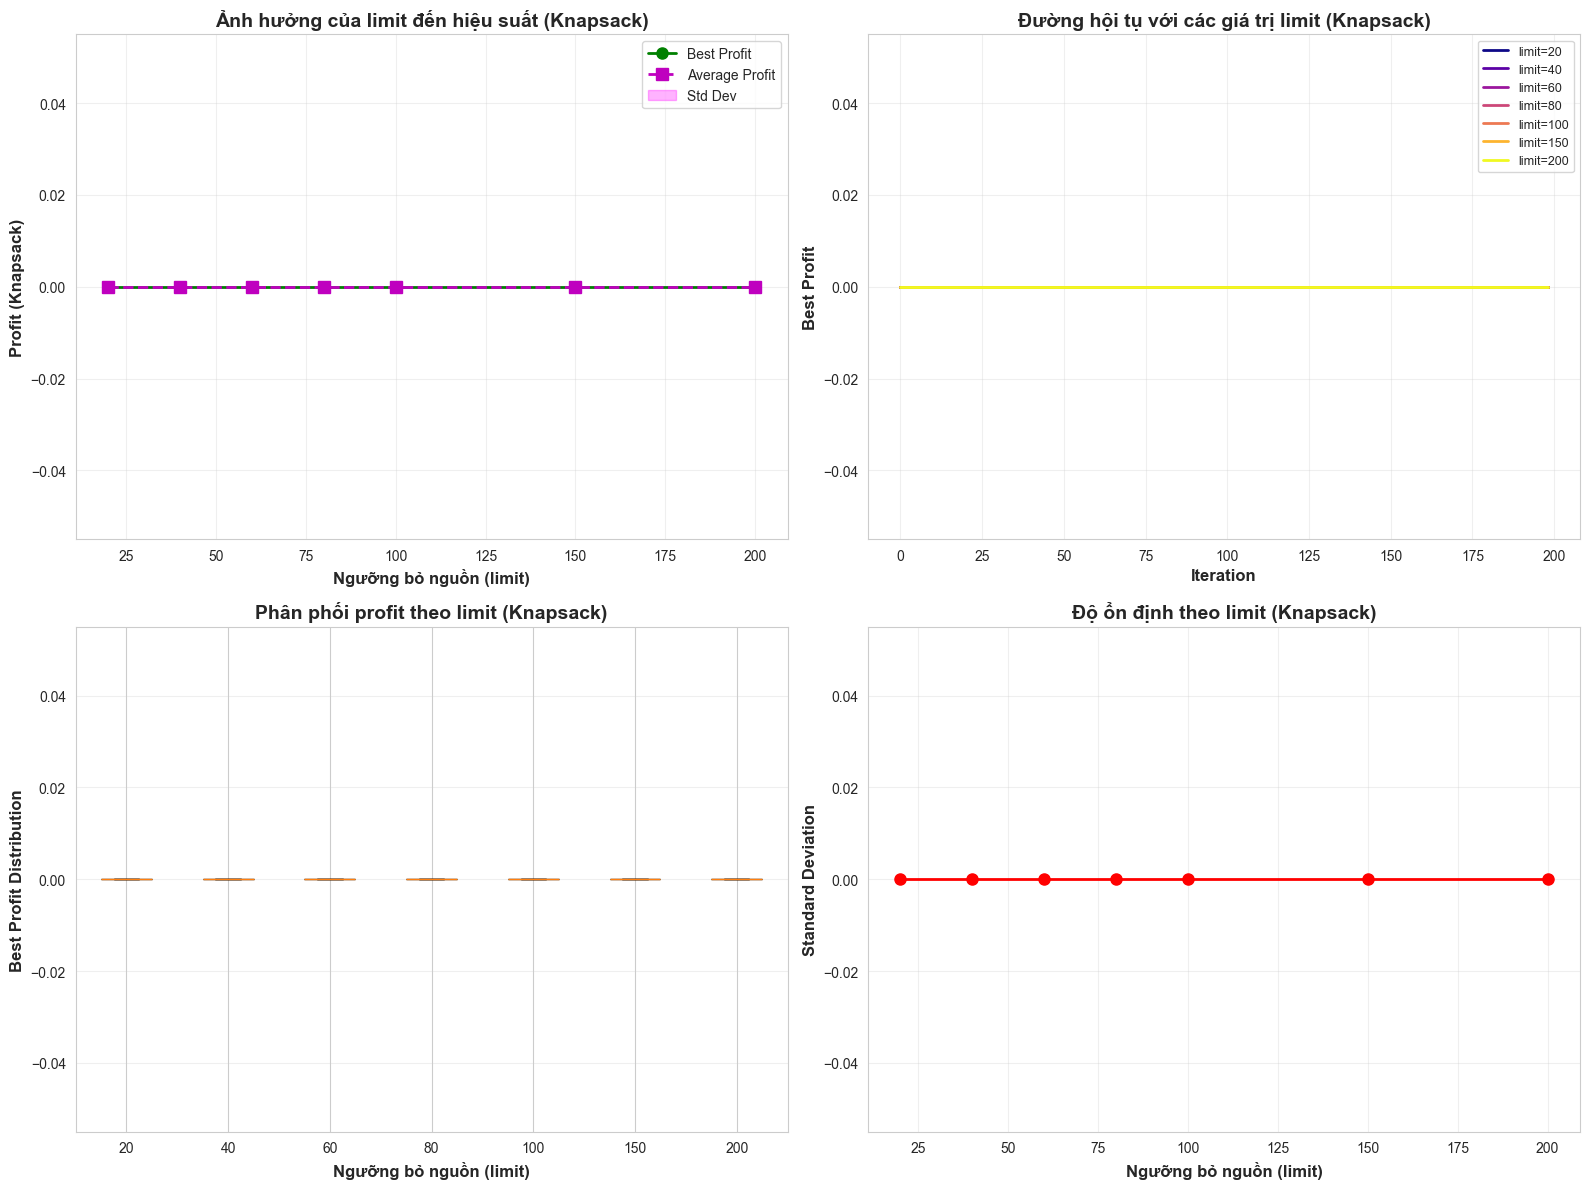

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

ax1 = axes[0, 0]
lim_vals = [r["limit"] for r in results_limit_ks]
best_vals = [r["best_fitness"] for r in results_limit_ks]
avg_vals = [r["avg_fitness"] for r in results_limit_ks]
std_vals = [r["std_fitness"] for r in results_limit_ks]

ax1.plot(lim_vals, best_vals, "go-", linewidth=2, markersize=8, label="Best Profit")
ax1.plot(lim_vals, avg_vals, "ms--", linewidth=2, markersize=8, label="Average Profit")
ax1.fill_between(
    lim_vals,
    np.array(avg_vals) - np.array(std_vals),
    np.array(avg_vals) + np.array(std_vals),
    alpha=0.3,
    color="magenta",
    label="Std Dev",
)
ax1.set_xlabel("Ngưỡng bỏ nguồn (limit)", fontsize=12, fontweight="bold")
ax1.set_ylabel("Profit (Knapsack)", fontsize=12, fontweight="bold")
ax1.set_title("Ảnh hưởng của limit đến hiệu suất (Knapsack)", fontsize=14, fontweight="bold")
ax1.legend(loc="best")
ax1.grid(True, alpha=0.3)

ax2 = axes[0, 1]
colors = plt.cm.plasma(np.linspace(0, 1, len(results_limit_ks)))
for i, result in enumerate(results_limit_ks):
    avg_history = np.mean(result["convergence_history"], axis=0)
    ax2.plot(avg_history, color=colors[i], linewidth=2, label=f"limit={result['limit']}")
ax2.set_xlabel("Iteration", fontsize=12, fontweight="bold")
ax2.set_ylabel("Best Profit", fontsize=12, fontweight="bold")
ax2.set_title("Đường hội tụ với các giá trị limit (Knapsack)", fontsize=14, fontweight="bold")
ax2.legend(loc="best", fontsize=9)
ax2.grid(True, alpha=0.3)

ax3 = axes[1, 0]
data_for_boxplot = [r["all_best_fitnesses"] for r in results_limit_ks]
bp = ax3.boxplot(data_for_boxplot, labels=lim_vals, patch_artist=True)
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)
ax3.set_xlabel("Ngưỡng bỏ nguồn (limit)", fontsize=12, fontweight="bold")
ax3.set_ylabel("Best Profit Distribution", fontsize=12, fontweight="bold")
ax3.set_title("Phân phối profit theo limit (Knapsack)", fontsize=14, fontweight="bold")
ax3.grid(True, alpha=0.3, axis="y")

ax4 = axes[1, 1]
ax4.plot(lim_vals, std_vals, "ro-", linewidth=2, markersize=8)
ax4.set_xlabel("Ngưỡng bỏ nguồn (limit)", fontsize=12, fontweight="bold")
ax4.set_ylabel("Standard Deviation", fontsize=12, fontweight="bold")
ax4.set_title("Độ ổn định theo limit (Knapsack)", fontsize=14, fontweight="bold")
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 3. Kết luận cho Knapsack Problem

### So sánh Knapsack vs Rosenbrock:

**Khác biệt chính:**
1. **Không gian tìm kiếm**: Binary {0,1}^n vs Continuous [-5,5]^n
2. **Local search**: Bit flipping vs Continuous perturbation
3. **Ràng buộc**: Capacity constraint vs Unconstrained
4. **Mục tiêu**: Maximization (profit) vs Minimization (error)

**Tham số tối ưu cho Knapsack:**
- `sn = 30-40`: Cần nhiều hơn Rosenbrock do không gian binary phức tạp hơn
- `limit = 60-100`: Scout bees cần hoạt động tích cực hơn để escape local optima
- `mcn = 200`: Tương tự Rosenbrock

**Quan sát:**
- Knapsack benefit từ population lớn hơn (sn=30-40 vs sn=20-25)
- Limit thấp hơn giúp exploration tốt hơn trong binary space
- Local search function rất quan trọng - bit flipping strategy ảnh hưởng lớn đến performance
